In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv("911.csv")

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
data.shape

(423909, 9)

In [7]:
data["title"].nunique()

141

In [9]:
column_names=list(data.columns)


In [10]:
column_names

['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

# seprating call type from the data

In [11]:
data.title.head()

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In [12]:
def call_type_separator(x):
    x = x.split(':')
    return x[0]

In [13]:
data['call_type'] = data['title'].apply(call_type_separator)

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
data["call_type"].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [16]:
data["call_type"].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

# Converting timestamp to pandas datetime

In [17]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'], infer_datetime_format=True)

In [18]:
data["timeStamp"].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

### Extracting year, month_name, day_name, hour of the day from timestamp column

In [19]:
import datetime as dt

In [20]:
data["Year"]=data["timeStamp"].dt.year

In [21]:
data["month"]=data["timeStamp"].dt.month_name()

In [22]:
data["hour"]=data["timeStamp"].dt.hour

In [23]:
data["day"]=data["timeStamp"].dt.day_name()

In [24]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,month,hour,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,17,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,17,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,14,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,16,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,16,Thursday


In [25]:
def separator(x):
    x = x.split(':')
    x = x[1]
    return x

In [26]:
data['emergency_type'] = data['title'].apply(separator)

In [27]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,month,hour,day,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,17,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,17,Thursday,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,14,Thursday,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,16,Thursday,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,16,Thursday,DIZZINESS


## Visualizing data with different parameters

In [28]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,call_type,Year,month,hour,day,emergency_type
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015,December,17,Thursday,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015,December,17,Thursday,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015,December,14,Thursday,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015,December,16,Thursday,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015,December,16,Thursday,DIZZINESS


In [29]:
call_types=data["call_type"].value_counts()

In [30]:
call_types

EMS        208676
Traffic    151458
Fire        63775
Name: call_type, dtype: int64

In [31]:
from decimal import Decimal




In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

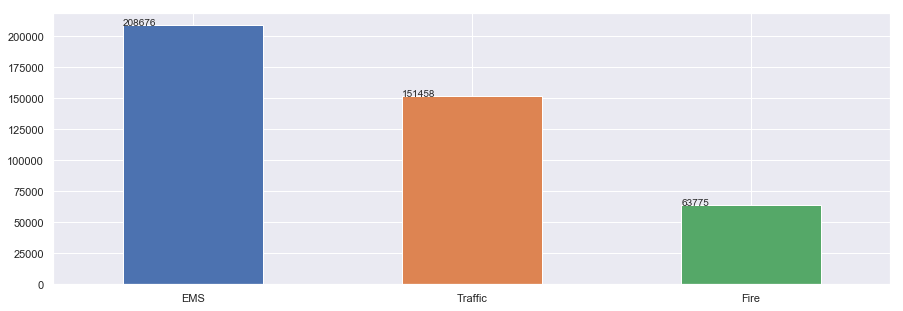

In [33]:
plt.figure(figsize=(15, 5))
graph = call_types.plot.bar()
for p in graph.patches:
    graph.annotate(Decimal(str(p.get_height())), (p.get_x(), p.get_height()))
plt.xticks(rotation=0)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 15 columns):
lat               423909 non-null float64
lng               423909 non-null float64
desc              423909 non-null object
zip               371780 non-null float64
title             423909 non-null object
timeStamp         423909 non-null datetime64[ns]
twp               423750 non-null object
addr              423909 non-null object
e                 423909 non-null int64
call_type         423909 non-null object
Year              423909 non-null int64
month             423909 non-null object
hour              423909 non-null int64
day               423909 non-null object
emergency_type    423909 non-null object
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 48.5+ MB


In [35]:
calls_data = data.groupby(['month', 'call_type'])['call_type'].count()

In [36]:
calls_data

month      call_type
April      EMS          17255
           Fire          4983
           Traffic      11345
August     EMS          17965
           Fire          5717
           Traffic      12290
December   EMS          16131
           Fire          4717
           Traffic      12171
February   EMS          16587
           Fire          4894
           Traffic      11347
January    EMS          18403
           Fire          5637
           Traffic      13784
July       EMS          18096
           Fire          5725
           Traffic      12584
June       EMS          17644
           Fire          5618
           Traffic      12909
March      EMS          17883
           Fire          5752
           Traffic      14031
May        EMS          17819
           Fire          5168
           Traffic      12657
November   EMS          14669
           Fire          4456
           Traffic      12518
October    EMS          18565
           Fire          5636
           Traffic 

In [37]:
percentage = calls_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [38]:
percentage.head()

month   call_type
April   EMS          51.0
        Fire         15.0
        Traffic      34.0
August  EMS          50.0
        Fire         16.0
Name: call_type, dtype: float64

In [39]:
font = {
    'size': 'x-large',
    'weight': 'bold'
}

In [40]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [41]:
percentage = percentage.reindex(month_order, level=0)

In [42]:
percentage = percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

In [43]:
percentage.head()

month     call_type
January   EMS          49.0
          Traffic      36.0
          Fire         15.0
February  EMS          51.0
          Traffic      35.0
Name: call_type, dtype: float64

Text(0.5, 1.0, 'Calls/Month')

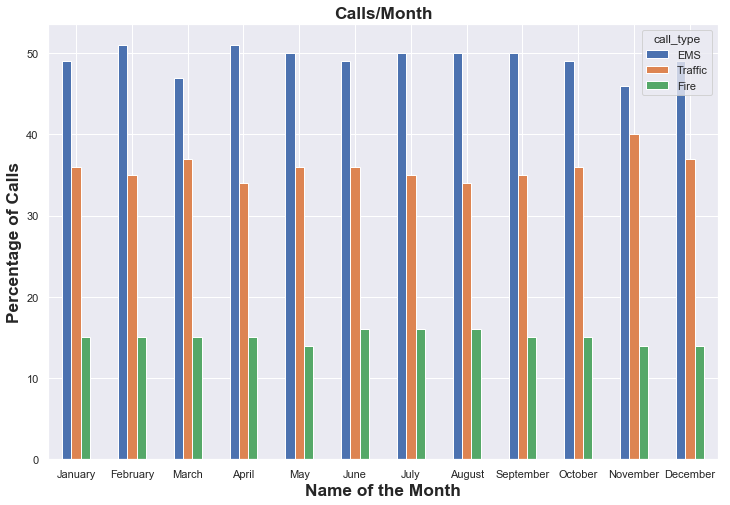

In [44]:
sns.set(rc={'figure.figsize':(12, 8)})
percentage.unstack().plot(kind='bar')
plt.xlabel('Name of the Month', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Month', fontdict=font)

# Hourly data

In [45]:
hours_data = data.groupby(['hour', 'call_type'])['call_type'].count()

In [46]:
hours_data.head()

hour  call_type
0     EMS          5263
      Fire         1341
      Traffic      2046
1     EMS          4711
      Fire         1104
Name: call_type, dtype: int64

In [47]:
hours_data_percentage = hours_data.groupby(level=0).apply(lambda x: round(100*x/float(x.sum())))

In [48]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Fire         16.0
      Traffic      24.0
1     EMS          64.0
      Fire         15.0
Name: call_type, dtype: float64

In [49]:
hours_data_percentage = hours_data_percentage.reindex(['EMS', 'Traffic', 'Fire'], level=1)

In [50]:
hours_data_percentage.head()

hour  call_type
0     EMS          61.0
      Traffic      24.0
      Fire         16.0
1     EMS          64.0
      Traffic      21.0
Name: call_type, dtype: float64

Text(0.5, 1.0, 'Calls/Hour')

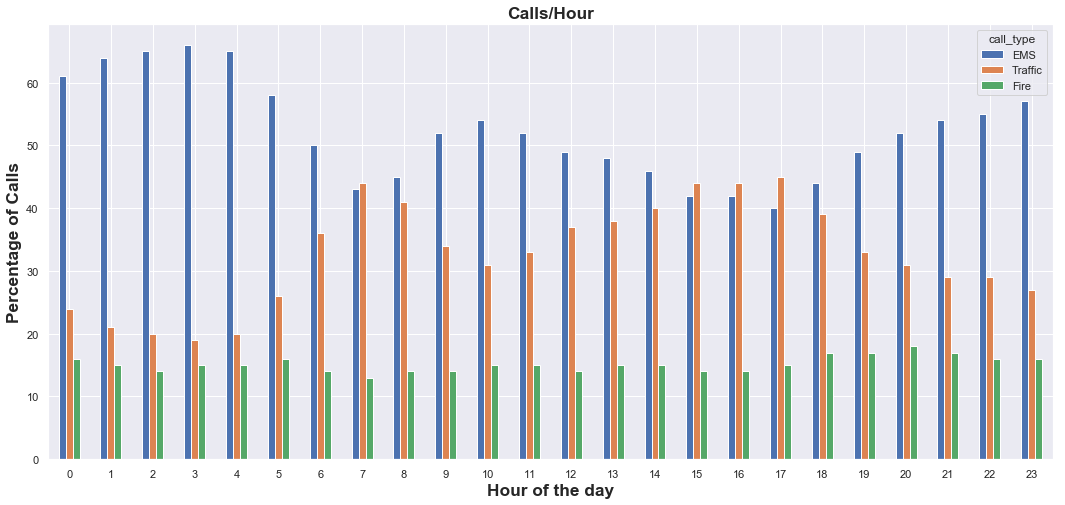

In [51]:
sns.set(rc={'figure.figsize':(18, 8)})
hours_data_percentage.unstack().plot(kind='bar')
plt.xlabel('Hour of the day', fontdict=font)
plt.ylabel('Percentage of Calls', fontdict=font)
plt.xticks(rotation=0)
plt.title('Calls/Hour', fontdict=font)